In [27]:
#First, let's import all necessary libraries
import sqlite3 #for connection with databases
import pandas as pd #for queries
import matplotlib.pyplot as plt #for plots
%matplotlib inline

In [10]:
conn = sqlite3.connect(r'factbook.db') #create a sqlite3 Connection instance
q1= "SELECT * FROM sqlite_master WHERE type='table';" # create a query
table = pd.read_sql_query(q1, conn) #return information in the form of tables
print(table)

    type             name         tbl_name  rootpage  \
0  table            facts            facts         2   
1  table  sqlite_sequence  sqlite_sequence         3   

                                                 sql  
0  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...  
1             CREATE TABLE sqlite_sequence(name,seq)  


In [4]:
# ALternatively, use the default sqlite3 querying method
cursor = conn.cursor()
results = cursor.execute(q1).fetchall()

In [33]:
# Return minimum and maximum values of birth rate, death rate
q2 = 'SELECT MIN(birth_rate), MAX(birth_rate), MIN(death_rate), MAX(death_rate) FROM facts;'
pd.read_sql_query(q2, conn)

,MIN(birth_rate),MAX(birth_rate),MIN(death_rate),MAX(death_rate)
0,6.65,45.45,1.53,14.89


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'birth_rate'}>,
        <AxesSubplot:title={'center':'death_rate'}>]], dtype=object)

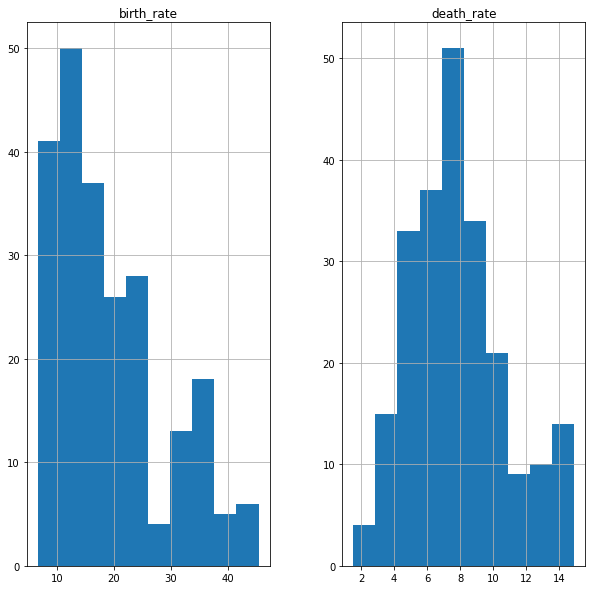

In [30]:
# First, let's draw a histogram for birth_rate and death_rate
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
qq = 'SELECT birth_rate, death_rate FROM facts'
pd.read_sql_query(qq, conn).hist(ax=ax)

In [29]:
# Now let's take a look at the country with a minimum death rate value.
q3 = 'SELECT * FROM facts WHERE death_rate == (SELECT MIN(death_rate) FROM facts)'
pd.read_sql_query(q3, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,141,qa,Qatar,11586,11586,0,2194817,3.07,9.84,1.53,22.39,2015-11-01 13:31:38.827541,2015-11-01 13:31:38.827541


In [26]:
#Let's take a look at the maximum death rate value.
q4 = 'SELECT * FROM facts WHERE death_rate == (SELECT MAX(death_rate) FROM facts)'
pd.read_sql_query(q4, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,98,lt,Lesotho,30355,30355,0,1947701,0.32,25.47,14.89,7.36,2015-11-01 13:28:12.551085,2015-11-01 13:28:12.551085


In [23]:
q5 = 'SELECT name, birth_rate-death_rate diff FROM facts ORDER BY diff desc LIMIT 10'
pd.read_sql_query(q5, conn)

,name,diff
0,Malawi,33.15
1,Uganda,33.10
2,Niger,33.03
3,Burundi,32.74
4,Mali,32.10
5,Burkina Faso,30.31
6,Zambia,29.46
7,Ethiopia,29.08
8,South Sudan,28.73
9,Tanzania,28.39
